In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
Salaries_df = pd.read_csv(r'C:\Users\e150230\OneDrive - Mohawk Industries\Desktop\Data Analytics\project\Data Analytics\UCDPA_ann-marie_devlin\ds_salaries.csv')

In [33]:
Salaries_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [34]:
#cleaning data
Salaries_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [35]:
Salaries_df['salary_currency']

0      EUR
1      USD
2      GBP
3      USD
4      USD
      ... 
602    USD
603    USD
604    USD
605    USD
606    USD
Name: salary_currency, Length: 607, dtype: object

In [36]:
Salaries_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [37]:
Salaries_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [38]:
#Replacing some of the values to understand the graphs clearly
Salaries_df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
Salaries_df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)
Salaries_df.company_size.replace(['S','M','L'], ['Small', 'Medium', 'Large'], inplace = True)

In [39]:
# Dropping some unnecessary columns
Salaries_df.drop(['salary','salary_currency','Unnamed: 0'], axis=1, inplace=True)

# to see changes in values
Salaries_df.head(100)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,FT,Data Scientist,79833,DE,On-site,DE,Large
1,2020,Senior,FT,Machine Learning Scientist,260000,JP,On-site,JP,Small
2,2020,Senior,FT,Big Data Engineer,109024,GB,Hybrid,GB,Medium
3,2020,Mid,FT,Product Data Analyst,20000,HN,On-site,HN,Small
4,2020,Senior,FT,Machine Learning Engineer,150000,US,Hybrid,US,Large
...,...,...,...,...,...,...,...,...,...
95,2021,Mid,FT,Cloud Data Engineer,89294,SG,Hybrid,SG,Large
96,2021,Entry,PT,AI Scientist,12000,BR,Remote,US,Small
97,2021,Mid,FT,Financial Data Analyst,450000,US,Remote,US,Large
98,2021,Entry,FT,Computer Vision Software Engineer,70000,US,Remote,US,Medium


In [40]:
# Web scrapping using Pandas , Pandas already imported
import requests


In [41]:
# World Data Web Scrap
url = 'https://www.worlddata.info/average-income.php'
tables = pd.read_html(url)


In [42]:
tables[0]


,Rank,Country,Avg. income per year,Avg. income per month
0,1,Monaco,"186,080 $","15,507 $"
1,2,Bermuda *,"122,470 $","10,206 $"
2,3,Switzerland,"90,600 $","7,550 $"
3,4,Luxembourg,"88,190 $","7,349 $"
4,5,Norway,"83,880 $","6,990 $"
...,...,...,...,...
64,65,Nepal,"1,220 $",102 $
65,66,Timor-Leste,"1,140 $",95 $
66,67,Ethiopia,940 $,78 $
67,68,Sudan,650 $,54 $


In [43]:
# Setting variable for new table getting info
df = tables[0]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   69 non-null     int64 
 1   Country                69 non-null     object
 2   Avg. income per year   69 non-null     object
 3   Avg. income per month  69 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB


,Rank
count,69.000000
mean,35.000000
std,20.062403
min,1.000000
25%,18.000000
50%,35.000000
75%,52.000000
max,69.000000


In [44]:
# Saving table to csv file
df.to_csv(r'C:\Users\e150230\OneDrive - Mohawk Industries\Desktop\Data Analytics\project\Data Analytics\UCDPA_ann-marie_devlin\World Avg Salaries.csv')


In [45]:
pd.read_csv('World Avg Salaries.csv')

,Unnamed: 0,Rank,Country,Avg. income per year,Avg. income per month
0,0,1,Monaco,"186,080 $","15,507 $"
1,1,2,Bermuda *,"122,470 $","10,206 $"
2,2,3,Switzerland,"90,600 $","7,550 $"
3,3,4,Luxembourg,"88,190 $","7,349 $"
4,4,5,Norway,"83,880 $","6,990 $"
...,...,...,...,...,...
64,64,65,Nepal,"1,220 $",102 $
65,65,66,Timor-Leste,"1,140 $",95 $
66,66,67,Ethiopia,940 $,78 $
67,67,68,Sudan,650 $,54 $


In [46]:
# Cleaning Data
df.info()
df.head()
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   69 non-null     int64 
 1   Country                69 non-null     object
 2   Avg. income per year   69 non-null     object
 3   Avg. income per month  69 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB
['Rank', 'Country', 'Avg. income per\xa0year', 'Avg. income per\xa0month']


In [47]:
df = df.drop('Avg. income per\xa0month', axis=1)

In [48]:
df.head()

,Rank,Country,Avg. income per year
0,1,Monaco,"186,080 $"
1,2,Bermuda *,"122,470 $"
2,3,Switzerland,"90,600 $"
3,4,Luxembourg,"88,190 $"
4,5,Norway,"83,880 $"


In [49]:
# drop $ sign from figures in avg income per year
df['Avg. income per\xa0year'] = df['Avg. income per\xa0year'].str.replace('$', '', regex=True)



In [50]:
# Check amendment on $ drop command
print(df)

    Rank      Country Avg. income per year
0      1       Monaco             186,080 
1      2    Bermuda *             122,470 
2      3  Switzerland              90,600 
3      4   Luxembourg              88,190 
4      5       Norway              83,880 
..   ...          ...                  ...
64    65        Nepal               1,220 
65    66  Timor-Leste               1,140 
66    67     Ethiopia                 940 
67    68        Sudan                 650 
68    69  Afghanistan                 390 

[69 rows x 3 columns]


In [51]:
# Installing country_converter to clean some columns
!pip install country_converter

In [52]:
import country_converter as cc

In [53]:
# lets clean column of both dataframes so we can merge and make some comparisons
Salaries_df['company_location']= cc.convert(names=Salaries_df['company_location'], to='name_short')
Salaries_df['employee_residence']= cc.convert(names=Salaries_df['employee_residence'], to='name_short')

In [68]:
#Rename Avg income column
df.rename(columns={'Avg. income per\xa0year':'$ Avg Income 2021'}, inplace=True)


In [69]:
# Rename Company location column so we can merge to df dataframe
Salaries_df.rename(columns={'company_location':'Country'}, inplace=True)
Salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,Country,company_size
0,2020,Mid,FT,Data Scientist,79833,Germany,On-site,Germany,Large
1,2020,Senior,FT,Machine Learning Scientist,260000,Japan,On-site,Japan,Small
2,2020,Senior,FT,Big Data Engineer,109024,United Kingdom,Hybrid,United Kingdom,Medium
3,2020,Mid,FT,Product Data Analyst,20000,Honduras,On-site,Honduras,Small
4,2020,Senior,FT,Machine Learning Engineer,150000,United States,Hybrid,United States,Large


In [70]:
# Dropping * from Country column so we can merge dataframes
df['Country'] = df['Country'].str.replace('*', '', regex=True)

In [71]:
df.head()

,Rank,Country,$ Avg Income 2021
0,1,Monaco,"186,080"
1,2,Bermuda,"122,470"
2,3,Switzerland,"90,600"
3,4,Luxembourg,"88,190"
4,5,Norway,"83,880"


In [72]:
# Validate how many countries in common between Dataframes before we merge
Salaries_df['Country'].isin(df['Country']).value_counts()

True     591
False     16
Name: Country, dtype: int64

In [73]:
df['Country'].isin(Salaries_df['Country']).value_counts()

True     38
False    31
Name: Country, dtype: int64

In [74]:
result_df = pd.merge(Salaries_df, df[['Country', '$ Avg Income 2021']], on='Country', how='left')

In [75]:
result_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,Country,company_size,$ Avg Income 2021
0,2020,Mid,FT,Data Scientist,79833,Germany,On-site,Germany,Large,"51,660"
1,2020,Senior,FT,Machine Learning Scientist,260000,Japan,On-site,Japan,Small,"42,650"
2,2020,Senior,FT,Big Data Engineer,109024,United Kingdom,Hybrid,United Kingdom,Medium,"44,480"
3,2020,Mid,FT,Product Data Analyst,20000,Honduras,On-site,Honduras,Small,NaN
4,2020,Senior,FT,Machine Learning Engineer,150000,United States,Hybrid,United States,Large,"70,930"


In [76]:
result_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
Country               object
company_size          object
$ Avg Income 2021     object
dtype: object

In [77]:
# Convert $ avg income 2021 to integer for comparisons and exploration
result_df['$ Avg Income 2021'] = result_df['$ Avg Income 2021'].str.replace(',', '')
result_df.dtypes
result_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,Country,company_size,$ Avg Income 2021
0,2020,Mid,FT,Data Scientist,79833,Germany,On-site,Germany,Large,51660
1,2020,Senior,FT,Machine Learning Scientist,260000,Japan,On-site,Japan,Small,42650
2,2020,Senior,FT,Big Data Engineer,109024,United Kingdom,Hybrid,United Kingdom,Medium,44480
3,2020,Mid,FT,Product Data Analyst,20000,Honduras,On-site,Honduras,Small,NaN
4,2020,Senior,FT,Machine Learning Engineer,150000,United States,Hybrid,United States,Large,70930


In [78]:
# Convert $ Avg income column from float to integer
result_df['$ Avg Income 2021'] = result_df['$ Avg Income 2021'].astype('float').fillna(0.0).round().astype('Int64')

In [79]:
result_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
Country               object
company_size          object
$ Avg Income 2021      Int64
dtype: object

In [80]:
# Rename column to understand comparisons 
result_df.rename(columns={'$ Avg Income 2021':'$ Avg Country Income 2021'}, inplace=True)

In [81]:
result_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,Country,company_size,$ Avg Country Income 2021
0,2020,Mid,FT,Data Scientist,79833,Germany,On-site,Germany,Large,51660
1,2020,Senior,FT,Machine Learning Scientist,260000,Japan,On-site,Japan,Small,42650
2,2020,Senior,FT,Big Data Engineer,109024,United Kingdom,Hybrid,United Kingdom,Medium,44480
3,2020,Mid,FT,Product Data Analyst,20000,Honduras,On-site,Honduras,Small,0
4,2020,Senior,FT,Machine Learning Engineer,150000,United States,Hybrid,United States,Large,70930


<Axes: >

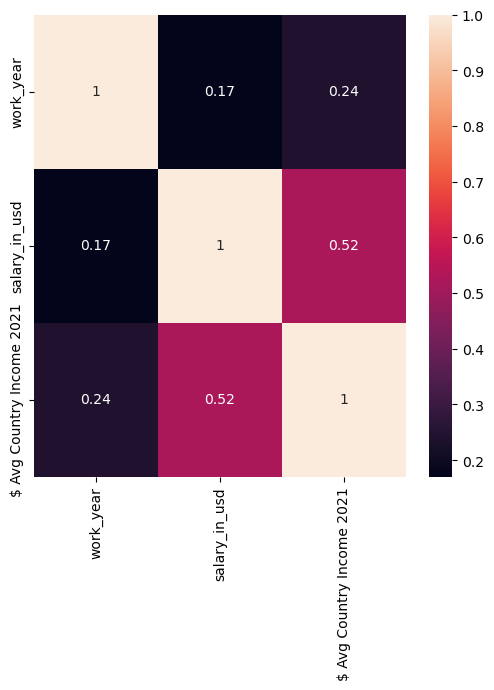

In [82]:
# Visualisation on heatmap
plt.figure(figsize=(6,6))
sns.heatmap(result_df.corr(numeric_only = True), annot=True)

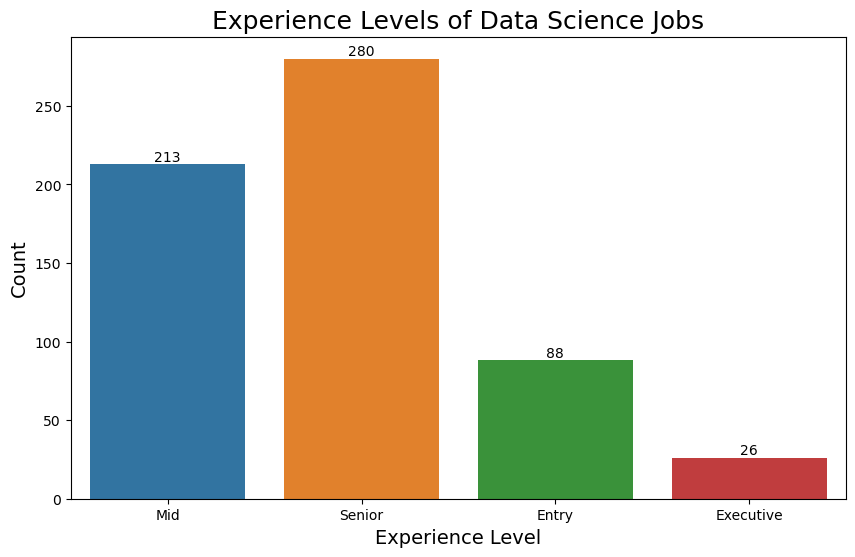

In [83]:
# Visualise on Barchart
plt.figure(figsize=(10,6))
plt.title('Experience Levels of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='experience_level', data=result_df)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

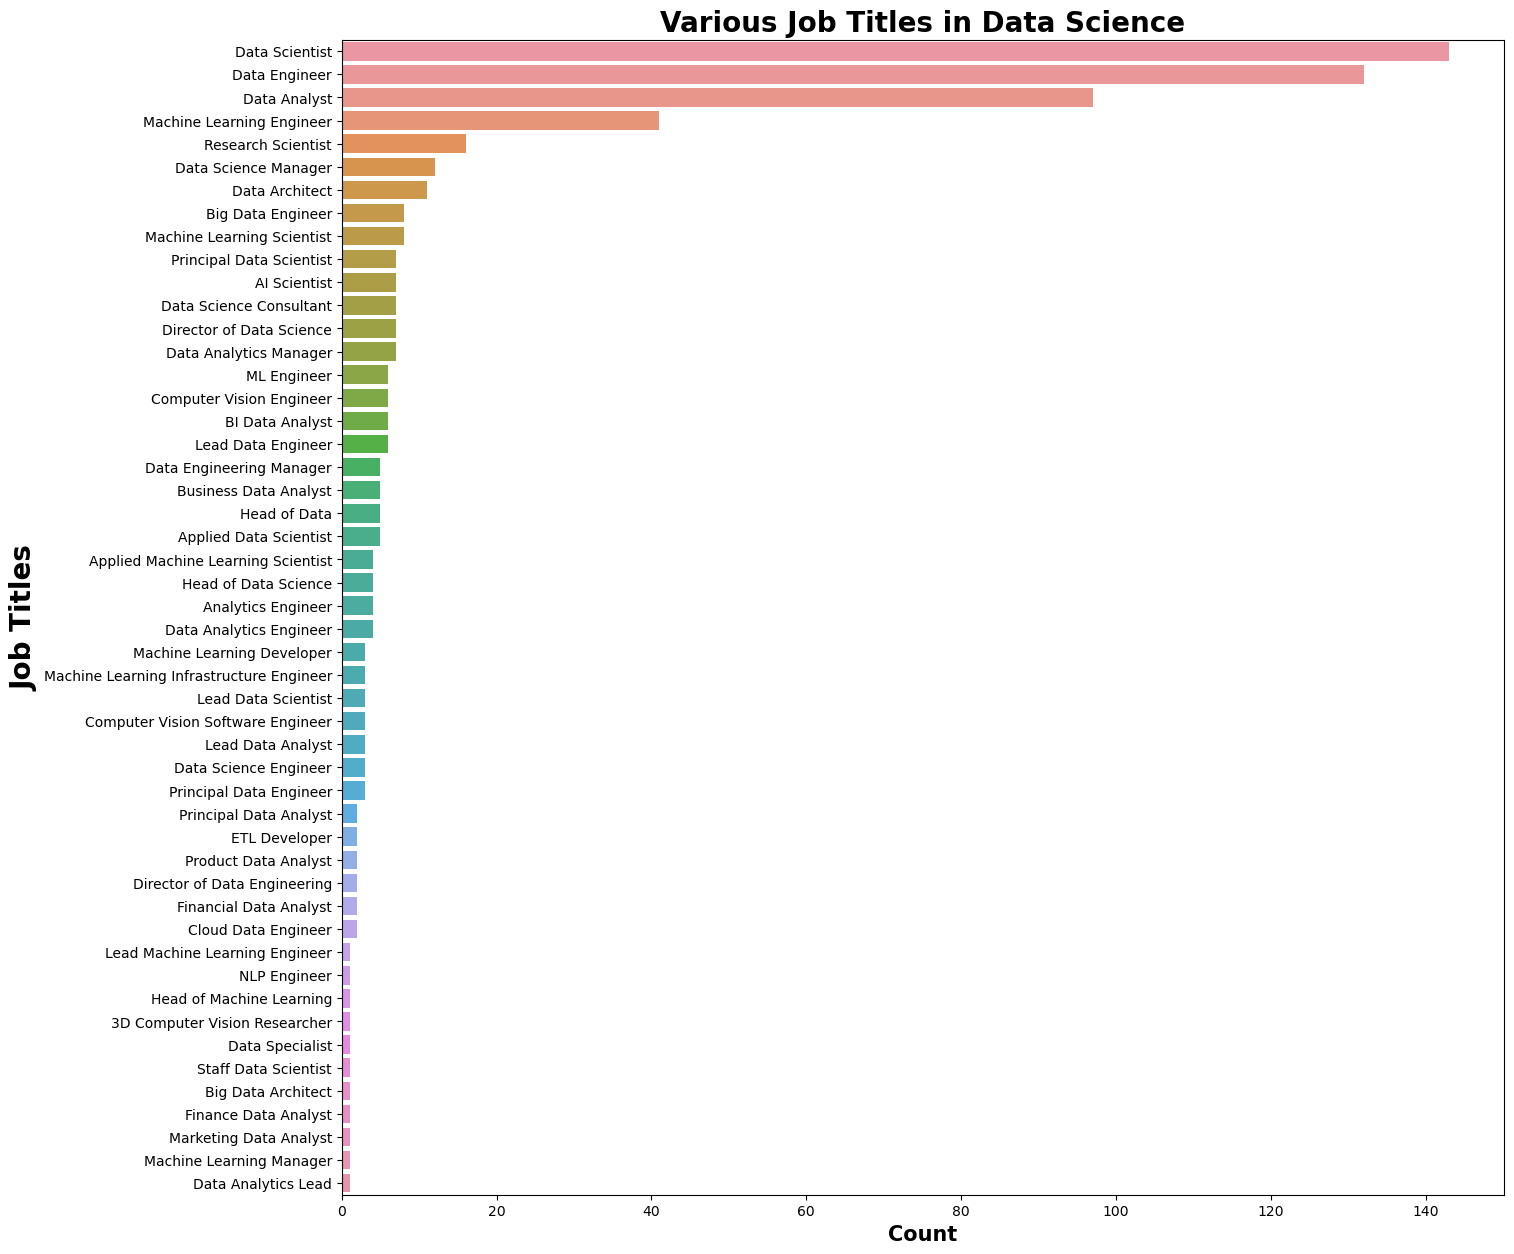

In [84]:
# The top 4 job titles include Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer. Other job titles have less than 20 people in the respective positions
plt.figure(figsize=(15,15))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=result_df, order=result_df['job_title'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

In [205]:
# DS Salaries by work year
Data_2021 = result_df[result_df['work_year'] == 2021]
Data_2021


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,Country,company_size,$ Avg Country Income 2021
72,2021,Entry,FT,Research Scientist,82528,United Kingdom,Hybrid,United Kingdom,Large,44480
73,2021,Executive,FT,BI Data Analyst,150000,India,Remote,United States,Large,70930
74,2021,Executive,FT,Head of Data,235000,United States,Remote,United States,Large,70930
75,2021,Senior,FT,Data Scientist,53192,France,Hybrid,France,Large,44160
76,2021,Mid,FT,BI Data Analyst,100000,United States,Remote,United States,Medium,70930
...,...,...,...,...,...,...,...,...,...,...
284,2021,Mid,FT,Research Scientist,69999,Czech Republic,Hybrid,Czech Republic,Large,0
285,2021,Senior,FT,Data Science Manager,94665,India,Hybrid,India,Large,2150
286,2021,Senior,FT,Head of Data,102839,Slovenia,Remote,Slovenia,Large,0
287,2021,Mid,FT,Data Scientist,109000,United States,Hybrid,United States,Large,70930


In [119]:
# Plot DS Salaries to country avg wage 2021
Data_2021 = Data_2021.dropna(subset=['work_year', 'experience_level', 'employment_type'])
Data_2021.isnull().sum()

work_year                    0
experience_level             0
employment_type              0
job_title                    0
salary_in_usd                0
employee_residence           0
remote_ratio                 0
Country                      0
company_size                 0
$ Avg Country Income 2021    0
dtype: int64

<Axes: xlabel='job_title'>

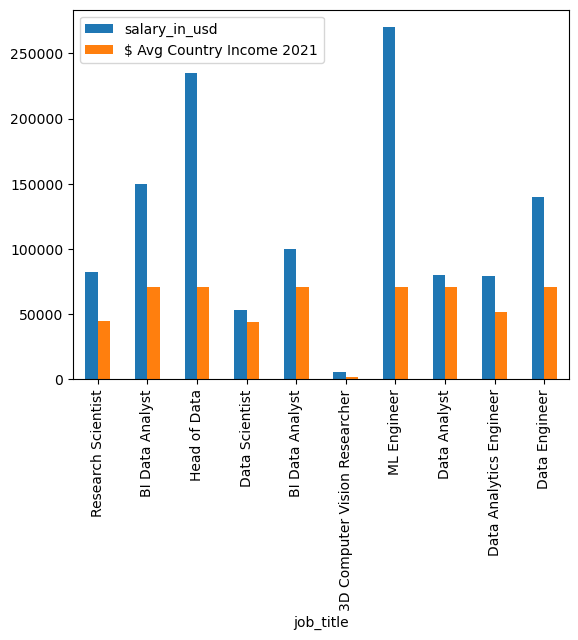

In [237]:
# plot on barchart avg salary of data science job with overall average salary each country
Data_2021_df= Data_2021[['salary_in_usd','$ Avg Country Income 2021', 'Country', 'job_title']]
Data_2021_index= Data_2021_df.head(10).set_index('job_title')
Data_2021_index.plot(kind='bar')

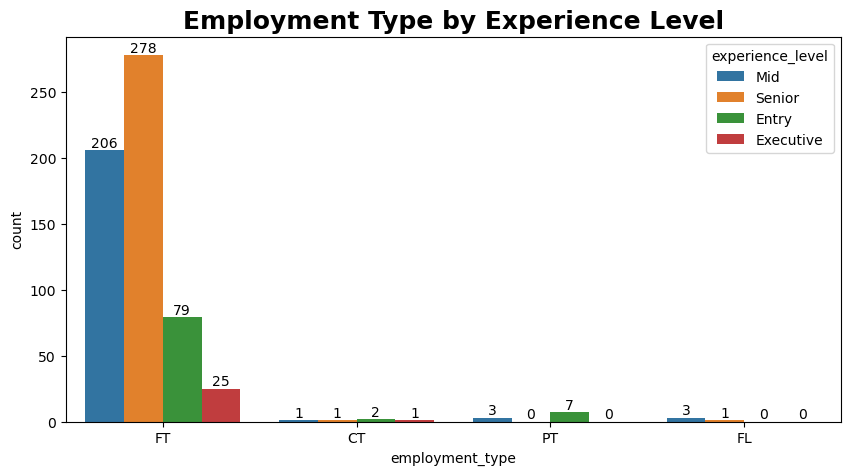

In [238]:
#Look at employment type by experience level
plt.figure(figsize=(10,5))
plt.title('Employment Type by Experience Level', fontsize=18, weight='bold')
ax=sns.countplot(x='employment_type', data=result_df, hue = 'experience_level')
for i in ax.containers:
    ax.bar_label(i)

In [240]:
#Top 10 Job Titles by Experience level
Top_10_titles = result_df['job_title'].value_counts()[0:10]
Top_10_titles

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

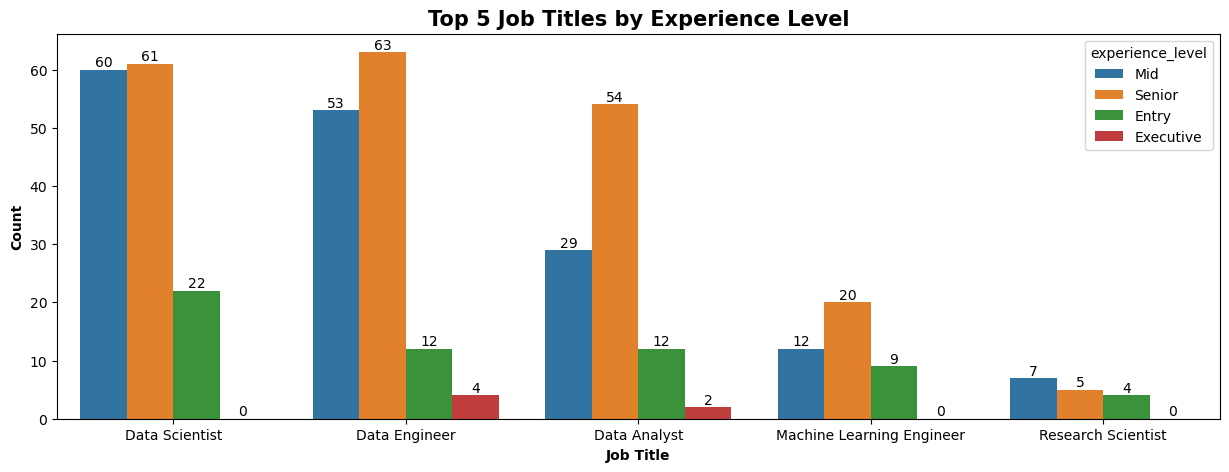

In [242]:
# Plot Top 5 Job titles by experience level
plt.figure(figsize=(15,5))
plt.title('Top 5 Job Titles by Experience Level', fontsize=15, fontweight='bold')
ax=sns.countplot(x='job_title', hue='experience_level', data=result_df, 
              order=result_df['job_title'].value_counts().iloc[:5].index)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.show()

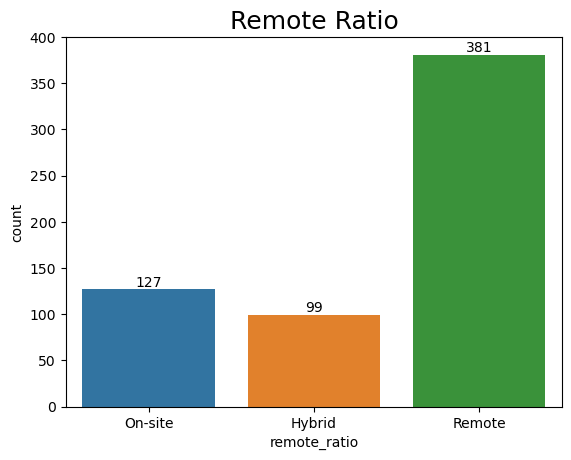

In [243]:
# Remote ratio by work year
plt.title ('Remote Ratio', fontsize=18)
ax = sns.countplot(x='remote_ratio', data=result_df)
for i in ax.containers:
    ax.bar_label(i)

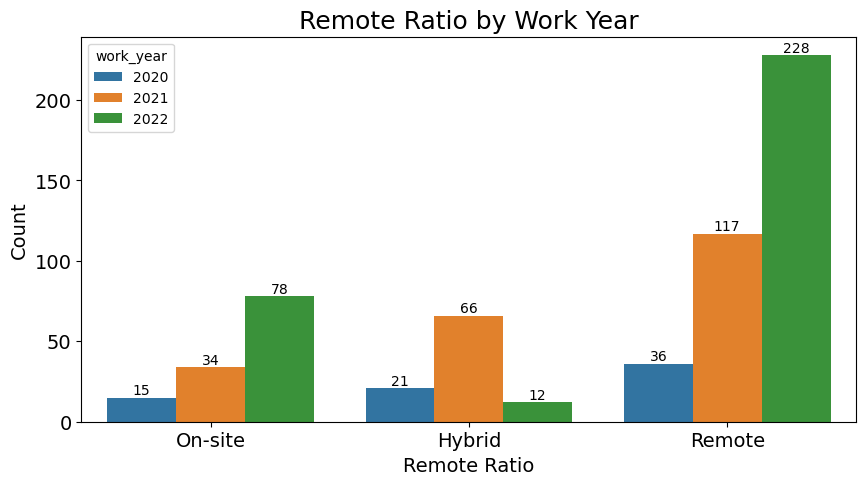

In [246]:
# Work Year analysis for remote working
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='remote_ratio', data=result_df, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()